In [1]:
import urllib2
import ssl
import json
from pprint import pprint
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def get_data(start_time, end_time, company):
    """Gets the price of a company in USD once per day from start date to end date and returns it as a dictionary"""
    company_data = dict()
    while start_time < end_time:
        data_point = get_datapoint(start_time, company)
        start_time += 86400
        company_data[start_time] = data_point
    return collections.OrderedDict(sorted(company_data.items(), key=lambda t: t[0]))
    
def get_datapoint(time, company):
    """Gets the price of a company in USD at a given time"""
    json_str = urllib2.urlopen("https://min-api.cryptocompare.com/data/pricehistorical?fsym=" + company + "&tsyms=USD&ts=" + str(time) + "&extraParams=your_app_name").read()
    json_data = json.loads(json_str)
    return json_data[company]["USD"]



In [8]:
#Run the data collection process
time_start = 1503964800 #August 29th at midnight
time_end = 1506643200 #September 29th at midnight
df = pd.DataFrame.from_dict(get_data(time_start, time_end, "BTC").items())
df.columns = ["Date", "Value"]

In [9]:
#Save the data to a CSV
df.to_csv("/Users/jberman/Desktop/bitcoin_data.csv")

In [12]:
df["Log"] = np.log(df['Value'])
df["Diffs"] = df["Log"].diff()

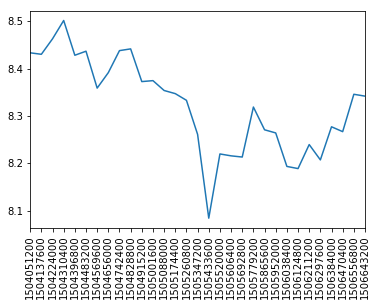

In [13]:
%matplotlib inline
ax = df["Log"].plot(xticks=df.index, rot=90)
ax.set_xticklabels(df["Date"])